## Preprocessing

In [149]:
#Data handling
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

# Dimensionality reduction
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
%matplotlib inline


In [151]:
#this section splits the unit from the amount into seperate columns for our adjuncts
#it then converts them to real numbers instead of strings for conversion
pd.set_option('display.max_columns', 500)
beer_df= pd.read_csv('beer_data_cleaned8-3_with_nums.csv')
beer_df['Adjunct1Num'],beer_df['Adjunct1Unit'] = beer_df['Adjunct1Amount'].str.split().str
beer_df['Adjunct2Num'],beer_df['Adjunct2Unit'] = beer_df['Adjunct2Amount'].str.split().str
beer_df['Adjunct3Num'],beer_df['Adjunct3Unit'] = beer_df['Adjunct3Amount'].str.split().str
beer_df['Adjunct4Num'],beer_df['Adjunct4Unit'] = beer_df['Adjunct4Amount'].str.split().str
beer_df['Adjunct5Num'],beer_df['Adjunct5Unit'] = beer_df['Adjunct5Amount'].str.split().str
beer_df.head(40)


C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  """
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  import sys
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  
C:\Users\mitch\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  if __name__ == '__main__':


In [150]:
pd.set_option('display.max_rows', 500)
beer_df.dtypes
objects = ['hop5percent','Adjunct1Num','Adjunct2Num','Adjunct3Num','Adjunct4Num','Adjunct5Num']
def nums():
    for i in objects:
        beer_df[i] = beer_df[i].astype(float).round(2)
    return beer_df
nums()
beer_df.dtypes

Batch_Style                  object
Category                     object
Batch_size_liters           float64
og                          float64
fg                          float64
abv                         float64
ibu                         float64
color_levibonds             float64
mashph                      float64
Base Malt Amount            float64
Base Malt                    object
BasePPG                     float64
BaseColor                   float64
BasePercentage              float64
SpecialtyMalt1Amount        float64
SpecialtyMalt1Name           object
SpecialtyMalt1PPG           float64
SpecialtyMalt1Color         float64
SpecialtyMalt1Percentage    float64
SpecialtyMalt2Amount         object
SpecialtyMalt2Name           object
SpecialtyMalt2PPG           float64
SpecialtyMalt2Color         float64
SpecialtyMalt2Percentage    float64
SpecialtyMalt3Amount        float64
SpecialtyMalt3Name           object
SpecialtyMalt3PPG            object
SpecialtyMalt3Color         

Imperial    59081
Metric      37621
Name: Flag, dtype: int64

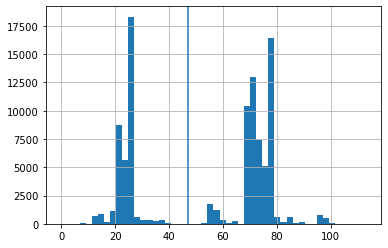

In [152]:
#this section finds a line to divide the dataset into imperial vs metric
beer_df['HighTemp'].hist(bins=50)
plt.axvline(47) #assign cutoff and create new variable to distinguish
beer_df.loc[beer_df['HighTemp'] <=47, 'Flag'] = 'Metric'
beer_df.loc[beer_df['HighTemp'] >47, 'Flag'] = 'Imperial'
beer_df['Flag'].value_counts()

In [153]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [154]:
adj_cols = ['Adjunct1Unit','Adjunct2Unit','Adjunct3Unit','Adjunct4Unit','Adjunct5Unit']
column_values = beer_df[adj_cols].values.ravel()
unique_values = pd.unique(column_values)
unique_values
convert_keys = [' ',.035724, .033814, 0.00,0.00,0.00,0.00,0.00,0.00,.033814,0.00,2.2,0.00,.219969,0.00,.033814,0.00,.033814,0.00,0.00]

adjdict = dict(zip(unique_values, convert_keys))
adjdict

{nan: ' ',
 'g': 0.035724,
 'ml': 0.033814,
 'tsp': 0.0,
 'each': 0.0,
 'g/l': 0.0,
 'lb': 0.0,
 'oz': 0.0,
 'tbsp': 0.0,
 'g/gal': 0.033814,
 'ml/gal': 0.0,
 'days': 2.2,
 'kg': 0.0,
 'min.': 0.219969,
 'L': 0.0,
 'qt': 0.033814,
 'ml/l': 0.0,
 'mg/l': 0.033814,
 'hr.': 0.0,
 'gal': 0.0}

In [155]:
kg_cols = ['Base Malt Amount','SpecialtyMalt1Amount','SpecialtyMalt2Amount','SpecialtyMalt1Amount']
gram_cols = ['hop1amount','hop2amount','hop3amount','hop4amount','hop5amount']
celcius_cols= ['LowTemp','HighTemp']
adj_cols = ['Adjunct1Num','Adjunct2Num','Adjunct3Num','Adjunct4Num','Adjunct5Num']
lookup_cols = ['Adjunct1Unit','Adjunct2Unit','Adjunct3Unit','Adjunct4Unit','Adjunct5Unit']
class convert:
    def kgtolb(row):
        for i in kg_cols:
            beer_df[i] = beer_df[i]*2.2
    def gram2oz(row):
        for i in gram_cols:
            beer_df[i] = beer_df[i]*.035274
    def celc2fah(row):
        for i in celcius_cols:
            beer_df[i] = (beer_df[i]*9/5)+32
    def met2imp(row):
        for i,j in convert_cols, lookup_cols:
            beer_df[i] = beer_df[j].map(adjdict)*[i]

In [6]:
#columns to be converted

def convert():
    for row in beer_df:
        if (beer_df['Flag'].equals("Metric")):
            kg_cols*2.2 #kg to lbs
            gram_cols *.035274 #grams to ounces
            celcius_cols*(9/5)+32 #celcius to fahrenheit
        return row
convert = ['Adjunct1Num','Adjunct2Num','Adjunct3Num','Adjunct4Num','Adjunct5Num']

for i in convert:
    if  
def conversion(row):
    if (beer_df['Flag'].equals("Metric")):
        kg_cols*2.2 #kg to lbs
        gram_cols *.035274 #grams to ounces
        celcius_cols*(9/5)+32 #celcius to fahrenheit
    elif beer_df['Adjunct1Unit'].equals('g'):
        beer_df['Adjunct1Num']*.035724 #to ounces
    elif beer_df['Adjunct1Unit'].equals('ml/gal' or 'ml/l' or 'ml'):
        beer_df['Adjunct1Num']*.033814 #to fl_oz
    elif beer_df['Adjunct1Unit'].equals('kg'):
        beer_df['Adjunct1Num']*2.2 #to lbs
    elif beer_df['Adjunct1Unit'].equals('L'):
        beer_df['Adjunct1Num']*.219969 #to gallons
    elif beer_df['Adjunct2Unit'].equals('g'):
        beer_df['Adjunct2Num']*.035724 #to ounces
    elif beer_df['Adjunct2Unit'].equals('ml/gal' or 'ml/l' or 'ml'):
        beer_df['Adjunct2Num']*.033814 #to fl_oz
    elif beer_df['Adjunct2Unit'].equals('kg'):
        beer_df['Adjunct2Num']*2.2 #to lbs
    elif beer_df['Adjunct2Unit'].equals('L'):
        beer_df['Adjunct2Num']*.219969 #to gallons
    elif beer_df['Adjunct3Unit'].equals('g'):
        beer_df['Adjunct3Num']*.035724 #to ounces
    elif beer_df['Adjunct3Unit'].equals('ml/gal' or 'ml/l' or 'ml'):
        beer_df['Adjunct3Num']*.033814 #to fl_oz
    elif beer_df['Adjunct3Unit'].equals('kg'):
        beer_df['Adjunct3Num']*2.2 #to lbs
    elif beer_df['Adjunct3Unit'].equals('L'):
        beer_df['Adjunct3Num']*.219969 #to gallons
    elif beer_df['Adjunct4Unit'].equals('g'):
        beer_df['Adjunct4Num']*.035724 #to ounces
    elif beer_df['Adjunct4Unit'].equals('ml/gal' or 'ml/l' or 'ml'):
        beer_df['Adjunct4Num']*.033814 #to fl_oz
    elif beer_df['Adjunct4Unit'].equals('kg'):
        beer_df['Adjunct4Num']*2.2 #to lbs
    elif beer_df['Adjunct4Unit'].equals('L'):
        beer_df['Adjunct4Num']*.219969 #to gallons
    elif beer_df['Adjunct5Unit'].equals('g'):
        beer_df['Adjunct5Num']*.035724 #to ounces
    elif beer_df['Adjunct5Unit'].equals('ml/gal' or 'ml/l' or 'ml'):
        beer_df['Adjunct5Num']*.033814 #to fl_oz
    elif beer_df['Adjunct5Unit'].equals('kg'):
        beer_df['Adjunct5Num']*2.2 #to lbs
    elif beer_df['Adjunct5Unit'].equals('L'):
        beer_df['Adjunct5Num']*.219969 #to gallons
    return(row)

beer_df.apply(conversion,axis=1)
        
        

In [8]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="most_frequent")),
        ('one_hot', OneHotEncoder()),
    ])
cat_attribs = ['Batch_Style','Category','Base Malt','SpecialtyMalt1Name', 'SpecialtyMalt2Name', 'SpecialtyMalt3Name','hop1name','hop1type','hop1timing',
                   'hop2name','hop2type','hop2timing','hop3name','hop3type','hop3timing','hop4name','hop4type','hop4timing','hop5name','hop5type','hop5timing',
                   'YeastStrain', 'Flocculation','Flag']
num_attribs = ['og','fg','abv','ibu', 'color_levibonds','mashph','LowTemp','HighTemp','Base Malt Amount','BasePPG','BaseColor','BasePercentage','SpecialtyMalt1Amount',
                 'SpecialtyMalt1PPG','SpecialtyMalt1Color','SpecialtyMalt1Percentage','SpecialtyMalt2Amount','SpecialtyMalt2PPG','SpecialtyMalt2Color','SpecialtyMalt2Percentage',
                 'SpecialtyMalt3Amount','SpecialtyMalt3PPG','SpecialtyMalt3Color','SpecialtyMalt3Percentage','hop1amount','hop1alpha','hop1time',
                 'hop1ibu','hop1percent','hop2amount','hop2alpha','hop2time','hop2ibu','hop2percent','hop3amount','hop3alpha','hop3time',
                 'hop3ibu','hop3percent','hop4amount','hop4alpha','hop4time','hop4ibu','hop4percent','hop5amount','hop5alpha','hop5time',
                 'hop5ibu','hop5percent','Attenuation','LowTemp','HighTemp']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

beer_prepared = full_pipeline.fit_transform(beer_df)


AttributeError: 'DataFrame' object has no attribute 'dtype'

In [8]:
beer_df.isnull().sum().sort_values(ascending=False)


Unnamed: 72                             96716
Adjunct4Num                             96716
Adjunct3Num                             96716
Adjunct2Num                             96716
Adjunct5Num                             96715
                                        ...  
hop2name_ Styrian dana                      0
hop2name_ Styrian Wolf                      0
hop2name_ Styrian Savinjsky Goldings        0
hop2name_ Styrian Goldings Bobek            0
Unnamed: 0                                  0
Length: 12072, dtype: int64

In [ ]:
#k-means
#cluster = []
#for i in range(1, 11):
#    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
 #   kmeans.fit(beer_df)
 #   wcss.append(kmeans.inertia_)
#plt.plot(range(1, 11), cluster)
#plt.title('Elbow Method')
#plt.xlabel('Number of clusters')
#plt.ylabel('Clusters')
#plt.show()

In [ ]:
#kmeans = KMeans(n_clusters=4)
#kmeans.fit(beer_df)

In [ ]:
#normalized kmeans
#normalized_vectors = preprocessing.normalize(beer_df)
#scores = [KMeans(n_clusters=i+2).fit(normalized_vectors).inertia_ for i in range(10)]
#sns.lineplot(np.arange(2, 12), scores)
#plt.xlabel('Number of clusters')
#plt.ylabel("Inertia")
#plt.title("Inertia of Cosine k-Means versus number of clusters")

In [ ]:
#normalized_kmeans = KMeans(n_clusters=4)
#normalized_kmeans.fit(normalized_vectors)